In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def draw_roc(doc_pp, adv_pp, beast_pp):
    # Simulated perplexity values (Replace with actual data)
    real_docs_perplexity = np.array(doc_pp)
    fake_docs_perplexity1 = np.array(adv_pp)
    fake_docs_perplexity2 = np.array(beast_pp)

    # Labels: 1 for real, 0 for fake
    y_true1 = np.concatenate([np.ones_like(real_docs_perplexity), np.zeros_like(fake_docs_perplexity1)])
    y_true2 = np.concatenate([np.ones_like(real_docs_perplexity), np.zeros_like(fake_docs_perplexity2)])

    # Scores (assuming lower perplexity means more likely to be real)
    y_scores1 = -np.concatenate([real_docs_perplexity, fake_docs_perplexity1])
    y_scores2 = -np.concatenate([real_docs_perplexity, fake_docs_perplexity2])

    # Compute ROC curves
    fpr1, tpr1, _ = roc_curve(y_true1, y_scores1)
    print("Adv fpr: ", fpr1)
    print("Adv tpr: ", tpr1)
    roc_auc1 = auc(fpr1, tpr1)

    fpr2, tpr2, _ = roc_curve(y_true2, y_scores2)
    roc_auc2 = auc(fpr2, tpr2)
    print("Beast fpr: ", fpr2)
    print("Beast tpr: ", tpr2)

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Adv ROC curve (AUC = {roc_auc1:.2f})')
    plt.plot(fpr2, tpr2, color='red', lw=2, label=f'Beast ROC curve (AUC = {roc_auc2:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

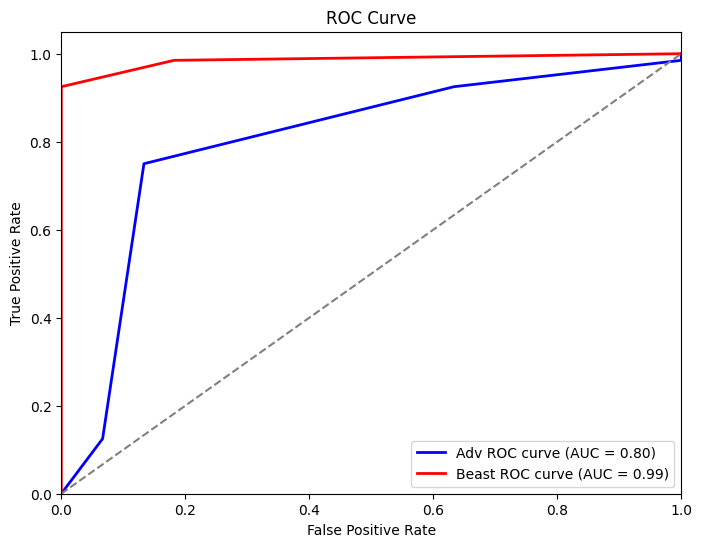

In [ ]:
import json
with open('../final_data/rag_doc_naturalness.json', 'r') as f:
    data = json.load(f)
rag_doc_readability = -np.array([p[1] for p in data])
rag_adv_readability = -np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 5, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 5, 3, 4, 3, 2])
rag_beast_readability = -np.array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1])

draw_roc(rag_doc_readability, rag_adv_readability, rag_beast_readability)

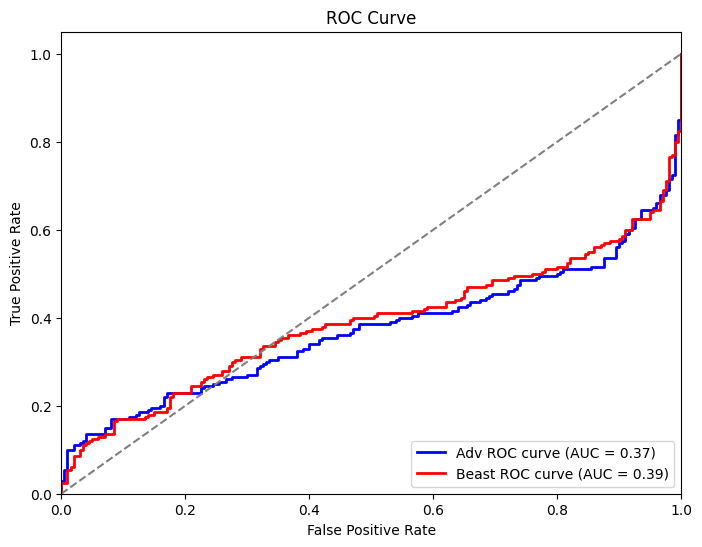

In [24]:
# jailbreak perplexity
jailbreak_doc_pp =  [7.718856334686279, 47.41199493408203, 62.58938217163086, 60.24538040161133, 69.10092163085938, 29.823162078857422, 70.70887756347656, 15.164409637451172, 17.48210334777832, 206.49378967285156, 13.570978164672852, 108.2650375366211, 20.70851707458496, 21.018434524536133, 12.252574920654297, 95.0806655883789, 42.44361877441406, 14.939793586730957, 35.51802444458008, 42.73544692993164, 20.492753982543945, 26.464824676513672, 72.05777740478516, 18.683231353759766, 33.84437561035156, 59.75525665283203, 14.797842979431152, 12.564167976379395, 58.22500228881836, 22.52570152282715, 43.489158630371094, 22.289291381835938, 59.59087371826172, 70.71788024902344, 66.52408599853516, 37.46807861328125, 45.6011848449707, 280.0645751953125, 148.38796997070312, 24.08390235900879, 8.630453109741211, 23.954404830932617, 20.65109634399414, 11.663680076599121, 71.8963623046875, 32.160030364990234, 177.65676879882812, 182.2066650390625, 25.366615295410156, 102.86732482910156, 113.64569854736328, 11.45572280883789, 51.8160514831543, 22.468116760253906, 31.753297805786133, 24.2618408203125, 14.19781494140625, 143.05178833007812, 520.504638671875, 113.24392700195312, 32.16984558105469, 28.885189056396484, 97.83747863769531, 89.56495666503906, 77.83248901367188, 13.217488288879395, 8.81247615814209, 106.12939453125, 58.2390251159668, 20.041833877563477, 10.684259414672852, 47.852989196777344, 44.81132507324219, 43.91712951660156, 29.598529815673828, 28.245420455932617, 110.0210952758789, 83.02104187011719, 65.70549774169922, 48.067508697509766, 55.02332305908203, 39.29628372192383, 42.72215270996094, 16.67375946044922, 21.80945587158203, 30.85820960998535, 26.268590927124023, 80.17747497558594, 11.690075874328613, 23.239614486694336, 21.979082107543945, 68.54930877685547, 64.137939453125, 160.58212280273438, 25.474769592285156, 39.2614631652832, 126.55136108398438, 18.80851936340332, 14.220805168151855, 86.72459411621094, 20.416942596435547, 76.18987274169922, 6.8680877685546875, 16.953420639038086, 27.461105346679688, 12.211519241333008, 42.109222412109375, 5.920131683349609, 52.20894241333008, 55.82703399658203, 20.409120559692383, 55.46902847290039, 11.242252349853516, 155.0450897216797, 55.32326889038086, 25.572702407836914, 21.935970306396484, 65.08859252929688, 39.017704010009766, 6.1409502029418945, 43.34054946899414, 11.929011344909668, 78.9354476928711, 5.645720958709717, 446.5028076171875, 79.06450653076172, 18.534469604492188, 162.61630249023438, 48.798919677734375, 67.10585021972656, 14.337053298950195, 9.394318580627441, 56.55906295776367, 14.078314781188965, 30.52657127380371, 82.22708892822266, 61.17866897583008, 10.956648826599121, 46.982269287109375, 76.86781311035156, 14.06202220916748, 24.303421020507812, 151.8963165283203, 52.75419998168945, 16.99433135986328, 35.23918151855469, 28.062557220458984, 8.790057182312012, 17.39310646057129, 97.38970947265625, 29.101003646850586, 55.28642654418945, 16.924245834350586, 19.226665496826172, 266.41363525390625, 19.074363708496094, 16.186460494995117, 30.637828826904297, 14.067025184631348, 8.760045051574707, 29.38055992126465, 67.30671691894531, 45.960121154785156, 23.512187957763672, 8.851218223571777, 92.18417358398438, 17.07928466796875, 66.56146240234375, 10.845773696899414, 82.99198913574219, 69.5186996459961, 42.38355255126953, 65.94992065429688, 59.115745544433594, 22.169979095458984, 45.02383804321289, 87.89923095703125, 21.906478881835938, 14.207862854003906, 19.529300689697266, 19.370588302612305, 28.860923767089844, 89.65515899658203, 46.273590087890625, 52.40743637084961, 22.72869873046875, 12.79128360748291, 131.2225799560547, 38.97671127319336, 63.28291702270508, 16.459272384643555, 33.3363151550293, 10.570161819458008, 13.422922134399414, 231.7029266357422, 20.528919219970703, 20.500267028808594, 89.41918182373047, 55.868900299072266, 35.42867660522461]
jailbreak_adv_pp =  [28.870790481567383, 13.944449424743652, 25.39021873474121, 22.300369262695312, 18.501625061035156, 36.35873794555664, 24.148263931274414, 21.226261138916016, 21.09960174560547, 55.34596252441406, 18.042247772216797, 22.08561134338379, 18.75558090209961, 23.942026138305664, 17.507137298583984, 24.57874298095703, 20.658235549926758, 15.301094055175781, 24.641206741333008, 27.947519302368164, 17.2738094329834, 32.23458480834961, 58.441322326660156, 24.98033905029297, 35.62950897216797, 21.95673942565918, 26.705490112304688, 24.735525131225586, 14.5847806930542, 20.233095169067383, 8.676009178161621, 13.617260932922363, 12.134824752807617, 12.507226943969727, 12.463541030883789, 14.624883651733398, 16.10486602783203, 14.846273422241211, 10.073305130004883, 13.572779655456543, 19.854501724243164, 22.370054244995117, 26.72066879272461, 32.00766372680664, 18.024553298950195, 14.34041690826416, 18.891437530517578, 26.98741912841797, 13.575430870056152, 13.10927677154541, 12.042800903320312, 14.157549858093262, 18.054676055908203, 18.93941307067871, 16.57268524169922, 16.560256958007812, 35.219520568847656, 29.075002670288086, 25.034440994262695, 16.510032653808594, 20.49284553527832, 21.581937789916992, 27.062368392944336, 43.7705192565918, 14.413018226623535, 24.614660263061523, 25.600013732910156, 26.817262649536133, 32.87500762939453, 27.453758239746094, 30.717714309692383, 61.80323791503906, 19.39654541015625, 17.55337905883789, 29.573657989501953, 13.686086654663086, 32.574642181396484, 28.493253707885742, 14.674188613891602, 14.116800308227539, 18.262386322021484, 39.339874267578125, 34.963897705078125, 46.788883209228516, 35.09028244018555, 19.90473175048828, 30.575620651245117, 17.898893356323242, 39.96455001831055, 36.07539749145508, 21.178916931152344, 23.422855377197266, 25.7504825592041, 25.983633041381836, 36.09352493286133, 28.9705867767334, 56.87616729736328, 19.175430297851562, 45.83863830566406, 78.31896209716797, 36.536502838134766, 35.43135452270508, 40.67252731323242, 47.26063919067383, 30.058059692382812, 19.33891487121582, 54.492042541503906, 30.155275344848633, 28.373210906982422, 53.0833854675293, 42.804019927978516, 29.9144287109375, 36.614410400390625, 34.67705535888672, 63.44689178466797, 87.40557861328125, 19.75717544555664, 26.268815994262695, 20.795604705810547, 19.327054977416992, 24.132280349731445, 14.415678977966309, 19.047033309936523, 26.522886276245117, 55.07621765136719, 19.814002990722656, 26.94167137145996, 43.97639465332031, 28.39170265197754, 53.681785583496094, 19.96476936340332, 57.66895294189453, 14.859635353088379, 35.613155364990234, 26.224218368530273, 20.524261474609375, 29.26565170288086, 36.52870178222656, 21.00140380859375, 26.325437545776367, 29.172401428222656, 35.2581672668457, 23.016254425048828, 25.380481719970703, 22.754112243652344, 20.07926368713379, 22.65128517150879, 15.188920974731445, 38.965450286865234, 37.894325256347656, 21.756839752197266, 38.186771392822266, 42.09563064575195, 26.834941864013672, 50.45485305786133, 30.198171615600586, 13.677119255065918, 30.550582885742188, 22.73969268798828, 24.89432716369629, 29.65765953063965, 28.05389404296875, 33.439002990722656, 23.392276763916016, 50.53058624267578, 24.431062698364258, 36.81865692138672, 15.100619316101074, 29.93827247619629, 37.53009796142578, 34.765865325927734, 23.345705032348633, 16.19301414489746, 22.149946212768555, 18.242130279541016, 25.055421829223633, 28.934001922607422, 26.97926139831543, 22.3837890625, 19.38198471069336, 54.80588150024414, 16.86737632751465, 20.059833526611328, 19.134929656982422, 17.60089111328125, 20.648073196411133, 23.23838233947754, 32.277042388916016, 21.96328353881836, 12.5829439163208, 34.713130950927734, 33.07123565673828, 24.816713333129883, 26.9990234375, 23.50708770751953, 25.501070022583008, 20.955163955688477, 21.338903427124023, 23.115488052368164, 17.753036499023438]
jailbreak_beast_pp =  [25.867216110229492, 24.55429458618164, 22.493682861328125, 27.611013412475586, 14.471309661865234, 35.37584686279297, 19.062965393066406, 28.393634796142578, 23.663137435913086, 32.98922348022461, 21.429487228393555, 19.58905792236328, 20.4646053314209, 43.65401077270508, 14.570368766784668, 18.97315216064453, 28.016916275024414, 22.192461013793945, 42.52907943725586, 25.738956451416016, 20.320592880249023, 26.21425437927246, 51.678253173828125, 26.829757690429688, 27.323532104492188, 26.42686653137207, 26.512195587158203, 27.36202049255371, 17.924137115478516, 20.712949752807617, 15.073321342468262, 14.291505813598633, 13.11859130859375, 13.447456359863281, 14.570350646972656, 14.061575889587402, 17.60775375366211, 13.826396942138672, 13.50739860534668, 10.591771125793457, 22.279462814331055, 26.9442081451416, 46.77507781982422, 48.849849700927734, 18.904184341430664, 12.597604751586914, 15.171512603759766, 23.067279815673828, 14.744913101196289, 14.897895812988281, 8.386860847473145, 34.12962341308594, 14.631053924560547, 27.136722564697266, 17.644073486328125, 24.03236198425293, 26.10456085205078, 79.40223693847656, 31.6884765625, 11.482004165649414, 25.095252990722656, 13.384248733520508, 14.550028800964355, 33.283565521240234, 15.084085464477539, 32.9931755065918, 35.24061965942383, 24.855148315429688, 31.538537979125977, 43.35531997680664, 55.59395980834961, 42.90199279785156, 19.406278610229492, 23.437049865722656, 31.086082458496094, 8.220293045043945, 37.6042594909668, 35.05263137817383, 14.686546325683594, 12.255596160888672, 15.471304893493652, 32.031333923339844, 52.70018005371094, 29.152631759643555, 28.96845054626465, 28.356281280517578, 26.877079010009766, 27.206438064575195, 30.553991317749023, 37.071388244628906, 40.540367126464844, 22.08728790283203, 33.33213424682617, 35.40121841430664, 24.17869758605957, 24.57537841796875, 45.597801208496094, 10.275588035583496, 22.198318481445312, 50.33393478393555, 28.617677688598633, 37.364768981933594, 53.437599182128906, 53.5241813659668, 33.59103012084961, 26.981435775756836, 50.712589263916016, 38.48619079589844, 34.06583786010742, 42.897369384765625, 28.48392105102539, 34.73086166381836, 27.96480941772461, 28.142831802368164, 73.01477813720703, 68.72054290771484, 20.36434555053711, 26.24696159362793, 17.23273468017578, 32.28461456298828, 21.44484519958496, 42.686283111572266, 29.025915145874023, 44.823429107666016, 39.41542053222656, 15.84592056274414, 31.3626708984375, 21.62656021118164, 26.007741928100586, 61.14717483520508, 17.540494918823242, 50.48677444458008, 19.261823654174805, 31.448240280151367, 25.053319931030273, 39.204193115234375, 33.47838592529297, 44.27637481689453, 20.66168975830078, 24.00208854675293, 18.33167266845703, 25.954452514648438, 12.189153671264648, 27.822254180908203, 23.298782348632812, 41.212886810302734, 20.180856704711914, 23.49263572692871, 26.737703323364258, 42.42431640625, 19.75171661376953, 26.97991180419922, 43.7469596862793, 40.99626159667969, 44.71644592285156, 37.16105651855469, 13.652388572692871, 31.036264419555664, 25.50223159790039, 23.33514404296875, 29.054033279418945, 28.288515090942383, 46.85084915161133, 25.17119789123535, 37.19363784790039, 20.438522338867188, 18.361221313476562, 16.033960342407227, 35.44949722290039, 67.99484252929688, 58.9296875, 20.81517791748047, 11.635270118713379, 21.18216323852539, 14.605695724487305, 14.776738166809082, 23.9425048828125, 34.9262809753418, 22.942533493041992, 21.322999954223633, 28.843669891357422, 24.16680908203125, 24.176998138427734, 40.90913009643555, 13.238900184631348, 24.274778366088867, 29.50931739807129, 24.85843276977539, 22.17488670349121, 16.48236083984375, 51.35246276855469, 38.49590301513672, 29.115230560302734, 32.0256233215332, 44.29997634887695, 22.55193519592285, 21.52644920349121, 24.929298400878906, 34.10853958129883, 20.50457000732422]
draw_roc(jailbreak_doc_pp, jailbreak_adv_pp, jailbreak_beast_pp)

[-5 -5 -4 -3 -4 -4 -4 -4 -3 -4 -5 -4 -3 -5 -5 -4 -5 -5 -5 -4 -5 -4 -5 -5
 -4 -4 -5 -5 -4 -4 -5 -4 -4 -5 -3 -5 -4 -5 -4 -4 -5 -4 -4 -5 -3 -5 -5 -3
 -4 -4 -5 -5 -4 -5 -4 -5 -3 -4 -5 -3 -3 -5 -3 -5 -5 -3 -5 -5 -4 -5 -4 -5
 -3 -5 -5 -5 -3 -4 -5 -4 -5 -4 -4 -4 -4 -3 -4 -5 -5 -5 -4 -3 -3 -3 -3 -5
 -3 -4 -4 -5 -5 -5 -4 -4 -3 -5 -4 -3 -5 -5 -5 -5 -5 -5 -4 -5 -5 -4 -5 -5
 -5 -5 -5 -5 -3 -3 -5 -5 -3 -5 -5 -5 -3 -5 -3 -4 -4 -5 -4 -5 -5 -5 -4 -4
 -4 -4 -4 -5 -4 -5 -4 -4 -4 -3 -5 -5 -5 -5 -5 -5 -4 -4 -3 -4 -4 -3 -5 -4
 -5 -5 -5 -3 -4 -5 -4 -4 -5 -5 -4 -4 -4 -4 -3 -5 -4 -5 -4 -3 -4 -5 -4 -5
 -5 -4 -4 -4 -5 -3 -5 -5]
[-3 -3 -3 -3 -3 -1 -4 -1 -3 -3 -3 -3 -4 -3 -4 -4 -4 -2 -1 -2]
[-1 -1 -3 -2 -2 -1 -2  0 -3 -1 -3 -2 -3 -2 -2 -4  0 -1  0 -1]


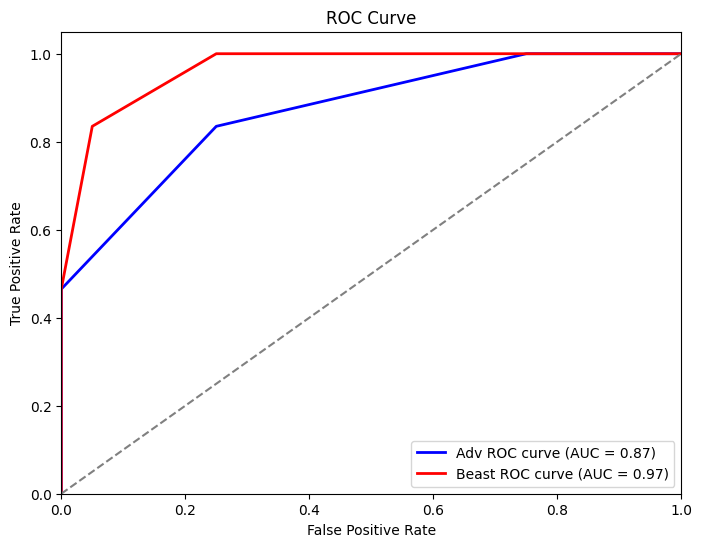

In [ ]:
# Jailbreak readability
with open('../final_data/alpaca_doc_naturalness.json', 'r') as f:
    data = json.load(f)
    doc_pp = -np.array([p[1] for p in data])
with open('/share/shmatikov/collin/adversarial_decoding/final_data/jailbreak_only/AdvDec_meta-llama_Meta-Llama-3.1-8B-Instruct_jailbreak_200_natural_naturalness_score.json', 'r') as f:
    data = json.load(f)
    adv_pp = -np.array([p[1] for p in data])
with open('/share/shmatikov/collin/adversarial_decoding/final_data/jailbreak_only/AdvDec_meta-llama_Meta-Llama-3.1-8B-Instruct_jailbreak_200_unnatural_naturalness_score.json', 'r') as f:
    data = json.load(f)
    beast_pp = -np.array([p[1] for p in data])
# print(doc_pp)
# print(adv_pp)
# print(beast_pp)
draw_roc(doc_pp, adv_pp, beast_pp)

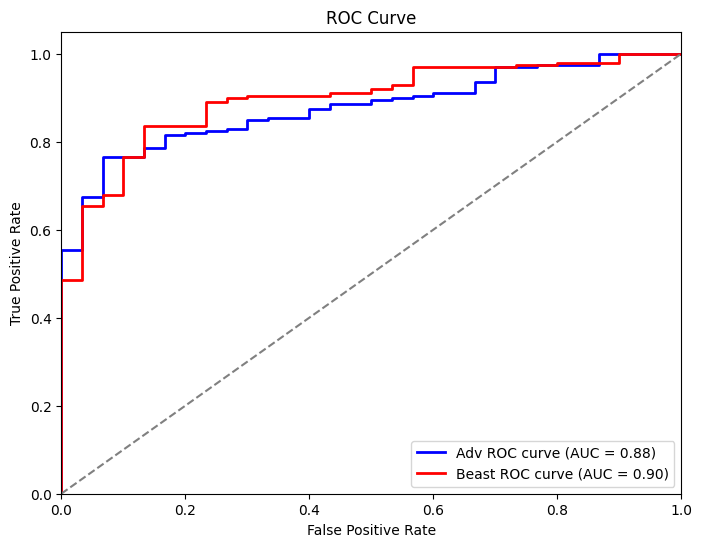

In [28]:
## Doc Perplexity
rag_doc_pp =  [24.179336547851562, 17.339845657348633, 7.8964152336120605, 4.866708755493164, 11.410240173339844, 7.388217926025391, 69.7354965209961, 6.378265380859375, 6.914112567901611, 9.385270118713379, 9.22479248046875, 10.280082702636719, 12.660065650939941, 16.150022506713867, 13.321757316589355, 10.286906242370605, 13.523272514343262, 12.7998046875, 9.990872383117676, 23.915298461914062, 6.157703399658203, 4.129727840423584, 24.60523796081543, 11.003300666809082, 10.867770195007324, 2.7855634689331055, 9.683273315429688, 33.87991714477539, 20.920225143432617, 7.569664478302002, 9.844300270080566, 8.327850341796875, 74.25570678710938, 25.69429588317871, 11.938193321228027, 9.3902006149292, 3.6389496326446533, 9.729582786560059, 17.382007598876953, 13.507743835449219, 10.448372840881348, 4.2000532150268555, 12.579448699951172, 11.175529479980469, 26.102447509765625, 36.930335998535156, 12.446255683898926, 7.651780605316162, 11.313838005065918, 4.838163375854492, 17.559755325317383, 3.537961959838867, 4.076307773590088, 5.554780960083008, 19.866519927978516, 5.179418563842773, 12.534165382385254, 9.452796936035156, 10.483114242553711, 10.409639358520508, 9.103946685791016, 5.742187976837158, 9.249064445495605, 14.607666969299316, 11.877406120300293, 7.737358570098877, 7.0740814208984375, 23.08491325378418, 23.050148010253906, 9.470291137695312, 17.350313186645508, 7.858550548553467, 15.503983497619629, 20.000547409057617, 14.196258544921875, 14.416440963745117, 5.597046375274658, 11.954063415527344, 37.95317840576172, 13.031903266906738, 19.398008346557617, 7.779844284057617, 9.615588188171387, 21.67804718017578, 9.828812599182129, 29.464813232421875, 4.063014984130859, 5.627946853637695, 5.056324481964111, 8.404938697814941, 83.28225708007812, 15.578657150268555, 9.760764122009277, 24.547826766967773, 52.68766784667969, 7.7287445068359375, 10.324942588806152, 13.728857040405273, 28.44517707824707, 9.463066101074219, 21.187992095947266, 12.275718688964844, 4.34009313583374, 18.95421600341797, 19.006370544433594, 10.952118873596191, 16.629005432128906, 1.9441977739334106, 23.118736267089844, 9.156429290771484, 12.621543884277344, 13.20921516418457, 16.443923950195312, 10.175703048706055, 17.820693969726562, 16.887405395507812, 12.403159141540527, 17.67959213256836, 17.993539810180664, 20.903553009033203, 6.066196918487549, 11.227532386779785, 13.08735179901123, 72.53889465332031, 13.201895713806152, 6.503620624542236, 20.61612892150879, 6.70328950881958, 18.93665885925293, 26.33284568786621, 12.149128913879395, 13.983232498168945, 13.451342582702637, 9.004015922546387, 29.507556915283203, 3.3060896396636963, 39.240726470947266, 5.432654857635498, 11.189374923706055, 12.086878776550293, 16.875255584716797, 20.435394287109375, 16.581724166870117, 16.290180206298828, 5.750946521759033, 9.034165382385254, 11.687051773071289, 6.378949165344238, 25.867074966430664, 14.156684875488281, 30.534643173217773, 7.219479084014893, 38.8988037109375, 34.80430603027344, 5.07316255569458, 16.017541885375977, 9.779865264892578, 7.523644924163818, 17.052942276000977, 19.945858001708984, 13.942129135131836, 5.9480390548706055, 10.40754222869873, 23.487524032592773, 7.155730247497559, 61.97008514404297, 34.84356689453125, 14.562567710876465, 4.511822700500488, 6.375165939331055, 13.681838989257812, 22.471593856811523, 13.264143943786621, 34.92431640625, 13.747922897338867, 17.70272445678711, 25.331024169921875, 5.474701404571533, 9.092823028564453, 10.303550720214844, 12.384758949279785, 12.514732360839844, 30.915006637573242, 13.93682861328125, 7.51095724105835, 9.929378509521484, 4.923821449279785, 19.109403610229492, 7.453615188598633, 9.185440063476562, 16.735721588134766, 17.596698760986328, 12.555023193359375, 6.272702217102051, 8.546247482299805, 10.71033000946045, 7.483958721160889, 6.064215660095215, 11.354645729064941, 9.935639381408691]
rag_adv_pp =  [54.604942321777344, 54.604942321777344, 26.194679260253906, 26.020536422729492, 21.633495330810547, 20.904211044311523, 29.33201789855957, 29.33201789855957, 20.929853439331055, 1511.786376953125, 34.30827331542969, 26.880935668945312, 20.621978759765625, 25.60284996032715, 45.727073669433594, 19.210399627685547, 23.084983825683594, 16.090641021728516, 25.48956871032715, 24.592363357543945, 18.2392635345459, 134.71629333496094, 120.15512084960938, 107.39854431152344, 23.239437103271484, 12.687788009643555, 18.56268882751465, 49.491188049316406, 56.565940856933594, 23.43221092224121]
rag_beast_pp =  [39.94636535644531, 58.91558074951172, 68.88803100585938, 14.603219032287598, 21.89080047607422, 22.241283416748047, 61.29865646362305, 67.26058197021484, 51.23331069946289, 44.23227310180664, 27.760784149169922, 63.65013122558594, 26.306377410888672, 22.00206756591797, 30.009536743164062, 18.234968185424805, 11.9036865234375, 16.22034454345703, 27.45258903503418, 26.556617736816406, 44.075408935546875, 132.05491638183594, 166.8104248046875, 140.1640167236328, 31.144895553588867, 42.40605163574219, 29.43551254272461, 25.735458374023438, 26.37559700012207, 29.14374542236328]

# doc_pp =  [24.179336547851562, 17.339845657348633, 7.8964152336120605, 4.866708755493164, 11.410240173339844, 7.388217926025391, 69.7354965209961, 6.378265380859375, 6.914112567901611, 9.385270118713379, 9.22479248046875, 10.280082702636719, 12.660065650939941, 16.150022506713867, 13.321757316589355, 10.286906242370605, 13.523272514343262, 12.7998046875, 9.990872383117676, 23.915298461914062, 6.157703399658203, 4.129727840423584, 24.60523796081543, 11.003300666809082, 10.867770195007324, 2.7855634689331055, 9.683273315429688, 33.87991714477539, 20.920225143432617, 7.569664478302002, 9.844300270080566, 8.327850341796875, 74.25570678710938, 25.69429588317871, 11.938193321228027, 9.3902006149292, 3.6389496326446533, 9.729582786560059, 17.382007598876953, 13.507743835449219, 10.448372840881348, 4.2000532150268555, 12.579448699951172, 11.175529479980469, 26.102447509765625, 36.930335998535156, 12.446255683898926, 7.651780605316162, 11.313838005065918, 4.838163375854492, 17.559755325317383, 3.537961959838867, 4.076307773590088, 5.554780960083008, 19.866519927978516, 5.179418563842773, 12.534165382385254, 9.452796936035156, 10.483114242553711, 10.409639358520508, 9.103946685791016, 5.742187976837158, 9.249064445495605, 14.607666969299316, 11.877406120300293, 7.737358570098877, 7.0740814208984375, 23.08491325378418, 23.050148010253906, 9.470291137695312, 17.350313186645508, 7.858550548553467, 15.503983497619629, 20.000547409057617, 14.196258544921875, 14.416440963745117, 5.597046375274658, 11.954063415527344, 37.95317840576172, 13.031903266906738, 19.398008346557617, 7.779844284057617, 9.615588188171387, 21.67804718017578, 9.828812599182129, 29.464813232421875, 4.063014984130859, 5.627946853637695, 5.056324481964111, 8.404938697814941, 83.28225708007812, 15.578657150268555, 9.760764122009277, 24.547826766967773, 52.68766784667969, 7.7287445068359375, 10.324942588806152, 13.728857040405273, 28.44517707824707, 9.463066101074219, 21.187992095947266, 12.275718688964844, 4.34009313583374, 18.95421600341797, 19.006370544433594, 10.952118873596191, 16.629005432128906, 1.9441977739334106, 23.118736267089844, 9.156429290771484, 12.621543884277344, 13.20921516418457, 16.443923950195312, 10.175703048706055, 17.820693969726562, 16.887405395507812, 12.403159141540527, 17.67959213256836, 17.993539810180664, 20.903553009033203, 6.066196918487549, 11.227532386779785, 13.08735179901123, 72.53889465332031, 13.201895713806152, 6.503620624542236, 20.61612892150879, 6.70328950881958, 18.93665885925293, 26.33284568786621, 12.149128913879395, 13.983232498168945, 13.451342582702637, 9.004015922546387, 29.507556915283203, 3.3060896396636963, 39.240726470947266, 5.432654857635498, 11.189374923706055, 12.086878776550293, 16.875255584716797, 20.435394287109375, 16.581724166870117, 16.290180206298828, 5.750946521759033, 9.034165382385254, 11.687051773071289, 6.378949165344238, 25.867074966430664, 14.156684875488281, 30.534643173217773, 7.219479084014893, 38.8988037109375, 34.80430603027344, 5.07316255569458, 16.017541885375977, 9.779865264892578, 7.523644924163818, 17.052942276000977, 19.945858001708984, 13.942129135131836, 5.9480390548706055, 10.40754222869873, 23.487524032592773, 7.155730247497559, 61.97008514404297, 34.84356689453125, 14.562567710876465, 4.511822700500488, 6.375165939331055, 13.681838989257812, 22.471593856811523, 13.264143943786621, 34.92431640625, 13.747922897338867, 17.70272445678711, 25.331024169921875, 5.474701404571533, 9.092823028564453, 10.303550720214844, 12.384758949279785, 12.514732360839844, 30.915006637573242, 13.93682861328125, 7.51095724105835, 9.929378509521484, 4.923821449279785, 19.109403610229492, 7.453615188598633, 9.185440063476562, 16.735721588134766, 17.596698760986328, 12.555023193359375, 6.272702217102051, 8.546247482299805, 10.71033000946045, 7.483958721160889, 6.064215660095215, 11.354645729064941, 9.935639381408691]
# adv_pp =  [42.42464828491211, 42.42464828491211, 29.274675369262695, 26.860492706298828, 24.46799659729004, 23.821352005004883, 34.12803649902344, 34.12803649902344, 26.826080322265625, 93.20977020263672, 40.67726516723633, 30.93635368347168, 27.589157104492188, 26.350732803344727, 27.77302360534668, 21.19594955444336, 23.727405548095703, 18.83978271484375, 25.44164276123047, 27.54854965209961, 22.30619239807129, 72.92410278320312, 68.0654067993164, 62.40333938598633, 26.167346954345703, 16.254314422607422, 19.58835220336914, 42.70684814453125, 45.5606803894043, 27.102304458618164]
# beast_pp =  [37.17721176147461, 49.14322280883789, 47.4496955871582, 17.77255630493164, 23.057294845581055, 23.085594177246094, 40.036983489990234, 37.92416000366211, 35.16286087036133, 37.80733871459961, 31.431987762451172, 47.032108306884766, 25.451343536376953, 21.951892852783203, 24.453744888305664, 17.633176803588867, 16.1556453704834, 19.29082489013672, 30.639070510864258, 30.07779312133789, 43.074928283691406, 109.57132720947266, 126.15526580810547, 110.37394714355469, 30.78708267211914, 40.65761184692383, 28.41691780090332, 29.51891326904297, 30.056440353393555, 32.33073043823242]

draw_roc(rag_doc_pp, rag_adv_pp, rag_beast_pp)

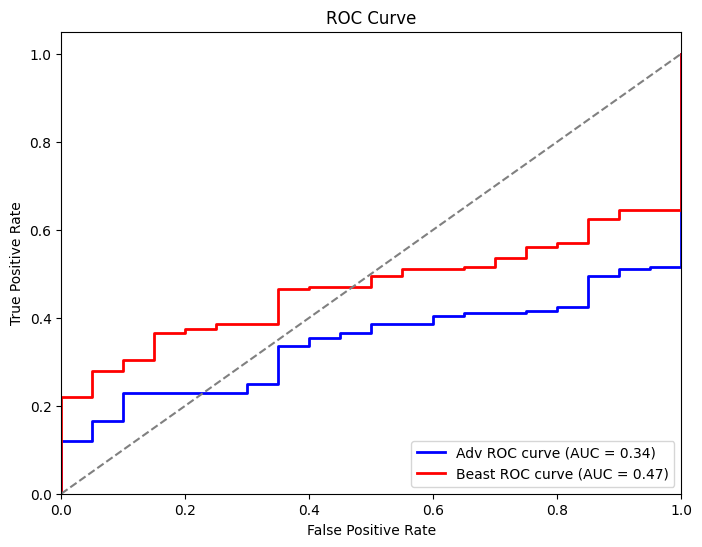

In [23]:
# Evasive Perplexity
alpaca_pp =  [7.718856334686279, 47.41199493408203, 62.58938217163086, 60.24538040161133, 69.10092163085938, 29.823162078857422, 70.70887756347656, 15.164409637451172, 17.48210334777832, 206.49378967285156, 13.570978164672852, 108.2650375366211, 20.70851707458496, 21.018434524536133, 12.252574920654297, 95.0806655883789, 42.44361877441406, 14.939793586730957, 35.51802444458008, 42.73544692993164, 20.492753982543945, 26.464824676513672, 72.05777740478516, 18.683231353759766, 33.84437561035156, 59.75525665283203, 14.797842979431152, 12.564167976379395, 58.22500228881836, 22.52570152282715, 43.489158630371094, 22.289291381835938, 59.59087371826172, 70.71788024902344, 66.52408599853516, 37.46807861328125, 45.6011848449707, 280.0645751953125, 148.38796997070312, 24.08390235900879, 8.630453109741211, 23.954404830932617, 20.65109634399414, 11.663680076599121, 71.8963623046875, 32.160030364990234, 177.65676879882812, 182.2066650390625, 25.366615295410156, 102.86732482910156, 113.64569854736328, 11.45572280883789, 51.8160514831543, 22.468116760253906, 31.753297805786133, 24.2618408203125, 14.19781494140625, 143.05178833007812, 520.504638671875, 113.24392700195312, 32.16984558105469, 28.885189056396484, 97.83747863769531, 89.56495666503906, 77.83248901367188, 13.217488288879395, 8.81247615814209, 106.12939453125, 58.2390251159668, 20.041833877563477, 10.684259414672852, 47.852989196777344, 44.81132507324219, 43.91712951660156, 29.598529815673828, 28.245420455932617, 110.0210952758789, 83.02104187011719, 65.70549774169922, 48.067508697509766, 55.02332305908203, 39.29628372192383, 42.72215270996094, 16.67375946044922, 21.80945587158203, 30.85820960998535, 26.268590927124023, 80.17747497558594, 11.690075874328613, 23.239614486694336, 21.979082107543945, 68.54930877685547, 64.137939453125, 160.58212280273438, 25.474769592285156, 39.2614631652832, 126.55136108398438, 18.80851936340332, 14.220805168151855, 86.72459411621094, 20.416942596435547, 76.18987274169922, 6.8680877685546875, 16.953420639038086, 27.461105346679688, 12.211519241333008, 42.109222412109375, 5.920131683349609, 52.20894241333008, 55.82703399658203, 20.409120559692383, 55.46902847290039, 11.242252349853516, 155.0450897216797, 55.32326889038086, 25.572702407836914, 21.935970306396484, 65.08859252929688, 39.017704010009766, 6.1409502029418945, 43.34054946899414, 11.929011344909668, 78.9354476928711, 5.645720958709717, 446.5028076171875, 79.06450653076172, 18.534469604492188, 162.61630249023438, 48.798919677734375, 67.10585021972656, 14.337053298950195, 9.394318580627441, 56.55906295776367, 14.078314781188965, 30.52657127380371, 82.22708892822266, 61.17866897583008, 10.956648826599121, 46.982269287109375, 76.86781311035156, 14.06202220916748, 24.303421020507812, 151.8963165283203, 52.75419998168945, 16.99433135986328, 35.23918151855469, 28.062557220458984, 8.790057182312012, 17.39310646057129, 97.38970947265625, 29.101003646850586, 55.28642654418945, 16.924245834350586, 19.226665496826172, 266.41363525390625, 19.074363708496094, 16.186460494995117, 30.637828826904297, 14.067025184631348, 8.760045051574707, 29.38055992126465, 67.30671691894531, 45.960121154785156, 23.512187957763672, 8.851218223571777, 92.18417358398438, 17.07928466796875, 66.56146240234375, 10.845773696899414, 82.99198913574219, 69.5186996459961, 42.38355255126953, 65.94992065429688, 59.115745544433594, 22.169979095458984, 45.02383804321289, 87.89923095703125, 21.906478881835938, 14.207862854003906, 19.529300689697266, 19.370588302612305, 28.860923767089844, 89.65515899658203, 46.273590087890625, 52.40743637084961, 22.72869873046875, 12.79128360748291, 131.2225799560547, 38.97671127319336, 63.28291702270508, 16.459272384643555, 33.3363151550293, 10.570161819458008, 13.422922134399414, 231.7029266357422, 20.528919219970703, 20.500267028808594, 89.41918182373047, 55.868900299072266, 35.42867660522461]
evasive_adv_pp =  [35.08925247192383, 24.928604125976562, 23.70625877380371, 25.048845291137695, 26.842037200927734, 27.66069793701172, 23.206939697265625, 27.276477813720703, 36.28813934326172, 37.83293914794922, 22.246246337890625, 17.88382339477539, 18.492259979248047, 17.49648094177246, 12.924847602844238, 26.31485939025879, 19.088788986206055, 14.309423446655273, 17.89409828186035, 28.44032096862793]
evasive_beast_pp =  [34.54981231689453, 43.526065826416016, 36.86709976196289, 25.348407745361328, 23.68777084350586, 51.8077507019043, 20.422502517700195, 31.685441970825195, 43.24965286254883, 40.79332733154297, 24.14461326599121, 21.01268768310547, 30.668825149536133, 54.20846176147461, 17.17852210998535, 31.337080001831055, 36.25555419921875, 24.563491821289062, 37.72438430786133, 53.98875045776367]
draw_roc(alpaca_pp, evasive_adv_pp, evasive_beast_pp)

[-3 -4 -1 -4 -1 -2 -1 -2 -3 -3 -3 -3 -4 -3 -2 -4 -3 -2 -2 -2]
[-1 -1 -3 -3 -3 -1 -1 -1 -3 -1 -1 -1 -1 -2 -2 -2 -1 -1 -3 -1]


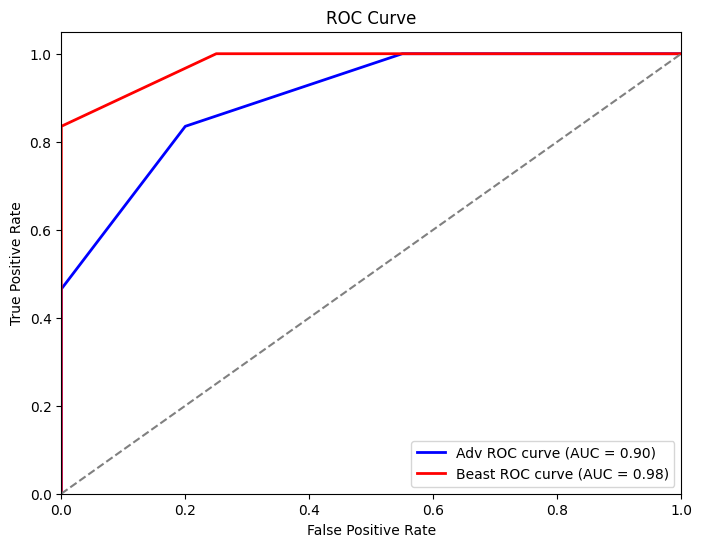

In [32]:
# Evasive Readability
with open('../final_data/alpaca_doc_naturalness.json', 'r') as f:
    data = json.load(f)
    doc_pp = -np.array([p[1] for p in data])
with open('/share/shmatikov/collin/adversarial_decoding/final_data/jailbreak_guard/jailbreak_guard_natural_beam20_topk10_skip10_natural005_readable_prompt_naturalness_score.json', 'r') as f:
    data = json.load(f)
    adv_pp = -np.array([p[1] for p in data])
with open('/share/shmatikov/collin/adversarial_decoding/final_data/jailbreak_guard/jailbreak_guard_unnatural_beam30_topk10_naturalness_score.json', 'r') as f:
    data = json.load(f)
    beast_pp = -np.array([p[1] for p in data])

print(adv_pp)
print(beast_pp)

draw_roc(doc_pp, adv_pp, beast_pp)
# get_fpr(doc_pp, adv_pp, beast_pp)

In [ ]:
def get_fpr(doc_pp, adv_pp, beast_pp):
    # Simulated perplexity values (Replace with actual data)
    real_docs_perplexity = np.array(doc_pp)
    fake_docs_perplexity1 = np.array(adv_pp)
    fake_docs_perplexity2 = np.array(beast_pp)

    # Labels: 1 for real, 0 for fake
    y_true1 = np.concatenate([np.ones_like(real_docs_perplexity), np.zeros_like(fake_docs_perplexity1)])
    y_true2 = np.concatenate([np.ones_like(real_docs_perplexity), np.zeros_like(fake_docs_perplexity2)])

    # Scores (assuming lower perplexity means more likely to be real)
    y_scores1 = -np.concatenate([real_docs_perplexity, fake_docs_perplexity1])
    y_scores2 = -np.concatenate([real_docs_perplexity, fake_docs_perplexity2])

    # Compute ROC curves
    fpr1, tpr1, _ = roc_curve(y_true1, y_scores1)
    print("Adv fpr: ", fpr1)
    print("Adv tpr: ", tpr1)
    # roc_auc1 = auc(fpr1, tpr1)

    fpr2, tpr2, _ = roc_curve(y_true2, y_scores2)
    # roc_auc2 = auc(fpr2, tpr2)
    print("Beast fpr: ", fpr2)
    print("Beast tpr: ", tpr2)